In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df=pd.read_csv("C:/Users/HP/Downloads/Clean_Dataset/Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### About the dataset:
#### The various features of the cleaned dataset are explained below:
#### 1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
#### 2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
#### 3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
#### 4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
#### 5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
#### 6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
#### 7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
#### 8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
#### 9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
#### 10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
#### 11) Price: Target variable stores information of the ticket price.

In [4]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

#### That means :
#### 1.In airline column there are 6 unique airlines 
#### 2.In source_city there are 6 unique cities as well as in destination city column also
#### 3.In arrival and departure columns there are 6 different timings 
#### 4.In class column there are economic and business classes

In [6]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['zero' 'one' 'two_or_more']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['Economy' 'Business']


#### The ticket price is mostly depends on time ,source and destination cities ,class, type of airlines and stops 

<AxesSubplot:xlabel='airline', ylabel='count'>

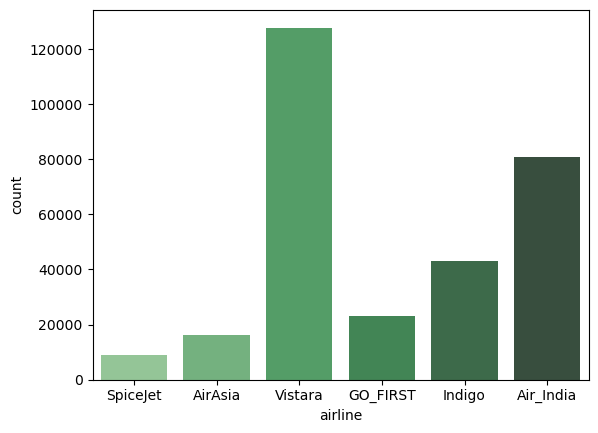

In [7]:
sns.countplot(x='airline',data=df,palette="Greens_d")
## More no. of flights are under Vistara airline 

<AxesSubplot:xlabel='price', ylabel='class'>

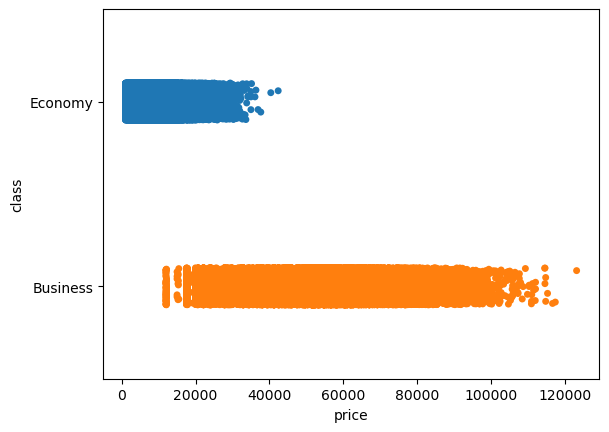

In [8]:
sns.stripplot(x='price',y='class',data=df)

<AxesSubplot:xlabel='class', ylabel='count'>

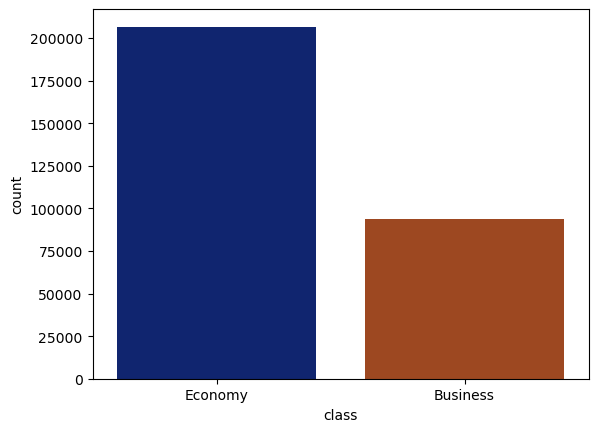

In [9]:
sns.countplot(x='class',data=df,palette='dark')

#### More no. of ticket classes are for economic class 

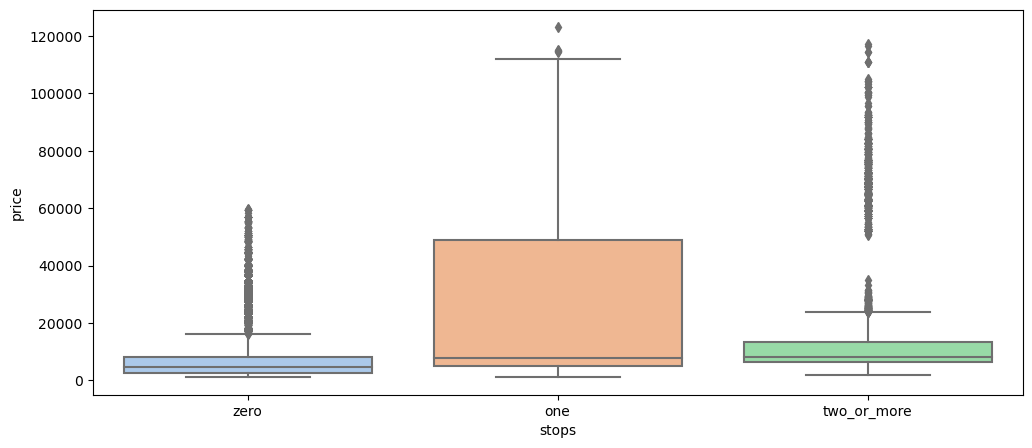

In [10]:
plt.figure(figsize=(12,5))
sns.boxplot(x='stops',y='price',data=df,palette='pastel')
plt.show()

In [11]:
df.corr()

,Unnamed: 0,duration,days_left,price
Unnamed: 0,1.000000,0.159007,0.014638,0.761177
duration,0.159007,1.000000,-0.039157,0.204222
days_left,0.014638,-0.039157,1.000000,-0.091949
price,0.761177,0.204222,-0.091949,1.000000


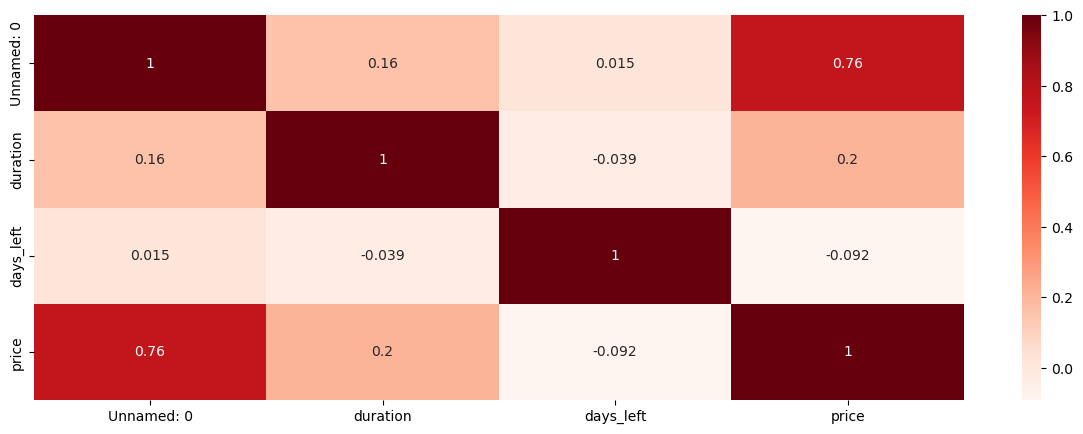

In [12]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='Reds')
plt.show()

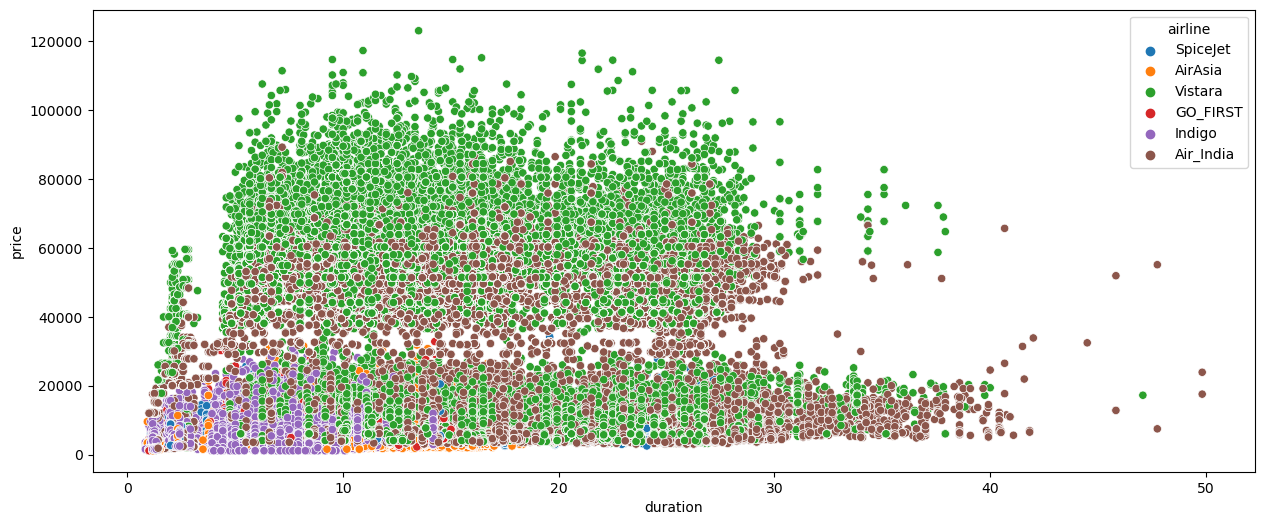

In [13]:
plt.figure(figsize=(15,6))
sns.scatterplot(df['duration'],df['price'],hue=df['airline'])
plt.show()
## as we see below plot there are many green points which are related to Vistara airline 

#### How price is changing from one airline to another ??

#### The Vistara airline ticket prices are far more than other airlines 

<AxesSubplot:xlabel='airline', ylabel='price'>

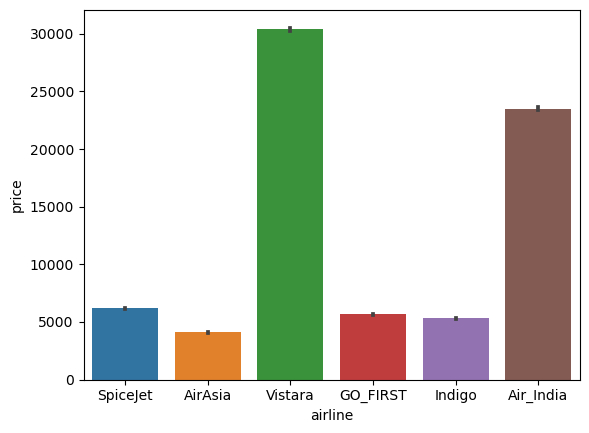

In [14]:
sns.barplot(x=df['airline'],y=df['price'])

### Tableau Dashboard for Ticket Prices in INDIA 


In [15]:
%%HTML
<div class='tableauPlaceholder' id='viz1660245509332' style='position: relative'><noscript><a href='#'><img alt='Flight Prices in INDIA      -      
How much costs a ticket price is ? ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fl&#47;FlightsPricesInINDIA&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'>
    <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> 
    <param name='path' value='views&#47;FlightsPricesInINDIA&#47;Dashboard1?:language=en-GB&amp;:embed=true' /> <param name='toolbar' value='yes' />
    <param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fl&#47;FlightsPricesInINDIA&#47;Dashboard1&#47;1.png' />
    <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' />
    <param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1660245509332');                    var vizElement = divElement.getElementsByTagName('object')[0];                   
    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='620px';vizElement.style.maxWidth='1250px';vizElement.style.width='100%';vizElement.style.minHeight='1087px';vizElement.style.maxHeight='1287px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} 
    else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='620px';vizElement.style.maxWidth='1250px';vizElement.style.width='100%';vizElement.style.minHeight='1087px';vizElement.style.maxHeight='1287px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} 
    else { vizElement.style.width='100%';vizElement.style.height='2127px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js'; 
    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>